In [ ]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Fraud Detection with MLP

### Preprocessing

In [ ]:
df = pd.read_csv("D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_2\\Data\\application_data.csv")

In [ ]:
# important features from the random forest model
df = df[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'NONLIVINGAREA_MEDI', 'DAYS_EMPLOYED', 'FLOORSMAX_MEDI', 'BASEMENTAREA_MODE','WEEKDAY_APPR_PROCESS_START', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'APARTMENTS_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'FLAG_OWN_CAR', 'DAYS_ID_PUBLISH', 'LIVINGAREA_AVG',
       'DAYS_BIRTH', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'FLAG_PHONE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'WALLSMATERIAL_MODE',
       'NONLIVINGAREA_MODE', 'EXT_SOURCE_3', 'TARGET']]

In [ ]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [ ]:
# 70% train, 20% test, 10% validation 
from sklearn.model_selection import train_test_split
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.3,
                                                        random_state=10, shuffle=True, stratify=y)
X_test, X_validation, y_test, y_validation = train_test_split(X_remain, y_remain, test_size=0.33,
                                                              random_state=10, shuffle=True, stratify=y_remain)

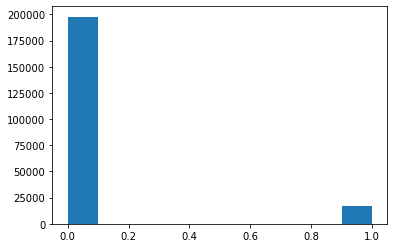

In [ ]:
plt.hist(y_train)
plt.show()

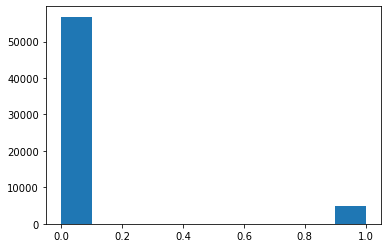

In [ ]:
plt.hist(y_test)
plt.show()

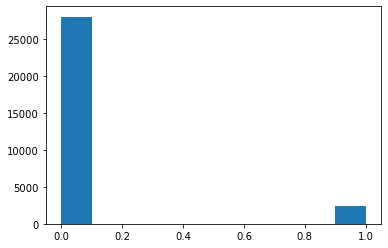

In [ ]:
plt.hist(y_validation)
plt.show()

In [ ]:
# dealing with the missing data
for column in X_train:
    
    if X_train[column].dtype == np.object_:
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
    else:
        X_train[column].fillna(X_train[column].median(), inplace=True)

for column in X_test:
    
    if X_test[column].dtype == np.object_:
        X_test[column].fillna(X_test[column].mode()[0], inplace=True)
    
    else:
        X_test[column].fillna(X_test[column].median(), inplace=True)

for column in X_validation:
    
    if X_validation[column].dtype == np.object_:
        X_validation[column].fillna(X_validation[column].mode()[0], inplace=True)
    
    else:
        X_validation[column].fillna(X_validation[column].median(), inplace=True)

In [ ]:
# encoding the categorical data
from sklearn.preprocessing import LabelEncoder

for column in X_train: 
    if X_train[column].dtype == np.object_:
        le = LabelEncoder()
        X_train[column] = le.fit_transform(X_train[column])
        X_test[column] = le.transform(X_test[column])
        X_validation[column] = le.transform(X_validation[column])

In [ ]:
# standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

### Model Development

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

METRICS = [
      tensorflow.keras.metrics.TruePositives(name='tp'),
      tensorflow.keras.metrics.FalsePositives(name='fp'),
      tensorflow.keras.metrics.TrueNegatives(name='tn'),
      tensorflow.keras.metrics.FalseNegatives(name='fn'), 
      tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
      tensorflow.keras.metrics.Precision(name='precision'),
      tensorflow.keras.metrics.Recall(name='recall'),
      tensorflow.keras.metrics.AUC(name='auc'),
      tensorflow.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model = Sequential()

model.add(Dense(23))

model.add(Dense(24, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=METRICS)

of_callback = tensorflow.keras.callbacks.EarlyStopping(
                                            monitor='val_prc', 
                                            verbose=1,
                                            patience=10,
                                            mode='max',
                                            restore_best_weights=True)

model_history = model.fit(x=X_train, y=y_train, batch_size=2048,
          validation_data=(X_validation, y_validation),
          epochs=100,
          callbacks=of_callback,
          verbose=1)

Epoch 1/100
106/106 [==============================] - 3s 13ms/step - loss: 0.3586 - tp: 513.0000 - fp: 5012.0000 - tn: 192868.0000 - fn: 16864.0000 - accuracy: 0.8984 - precision: 0.0929 - recall: 0.0295 - auc: 0.5583 - prc: 0.0912 - val_loss: 0.2814 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27986.0000 - val_fn: 2458.0000 - val_accuracy: 0.9193 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6450 - val_prc: 0.1370
Epoch 2/100
106/106 [==============================] - 1s 5ms/step - loss: 0.2717 - tp: 49.0000 - fp: 85.0000 - tn: 197795.0000 - fn: 17328.0000 - accuracy: 0.9191 - precision: 0.3657 - recall: 0.0028 - auc: 0.6728 - prc: 0.1577 - val_loss: 0.2671 - val_tp: 4.0000 - val_fp: 15.0000 - val_tn: 27971.0000 - val_fn: 2454.0000 - val_accuracy: 0.9189 - val_precision: 0.2105 - val_recall: 0.0016 - val_auc: 0.6880 - val_prc: 0.1644
Epoch 3/100
106/106 [==============================] - 1s 5ms/step - loss: 0.2634 - tp: 82.0000 - fp: 115.0000 - tn: 197765.0

106/106 [==============================] - 0s 3ms/step - loss: 0.2532 - tp: 105.0000 - fp: 66.0000 - tn: 197814.0000 - fn: 17272.0000 - accuracy: 0.9195 - precision: 0.6140 - recall: 0.0060 - auc: 0.7318 - prc: 0.2136 - val_loss: 0.2555 - val_tp: 23.0000 - val_fp: 10.0000 - val_tn: 27976.0000 - val_fn: 2435.0000 - val_accuracy: 0.9197 - val_precision: 0.6970 - val_recall: 0.0094 - val_auc: 0.7221 - val_prc: 0.2066
Epoch 40/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2533 - tp: 102.0000 - fp: 79.0000 - tn: 197801.0000 - fn: 17275.0000 - accuracy: 0.9194 - precision: 0.5635 - recall: 0.0059 - auc: 0.7316 - prc: 0.2137 - val_loss: 0.2557 - val_tp: 27.0000 - val_fp: 15.0000 - val_tn: 27971.0000 - val_fn: 2431.0000 - val_accuracy: 0.9197 - val_precision: 0.6429 - val_recall: 0.0110 - val_auc: 0.7225 - val_prc: 0.2064
Epoch 41/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2532 - tp: 99.0000 - fp: 77.0000 - tn: 197803.0000 - fn: 17278.0000 - acc

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[1], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

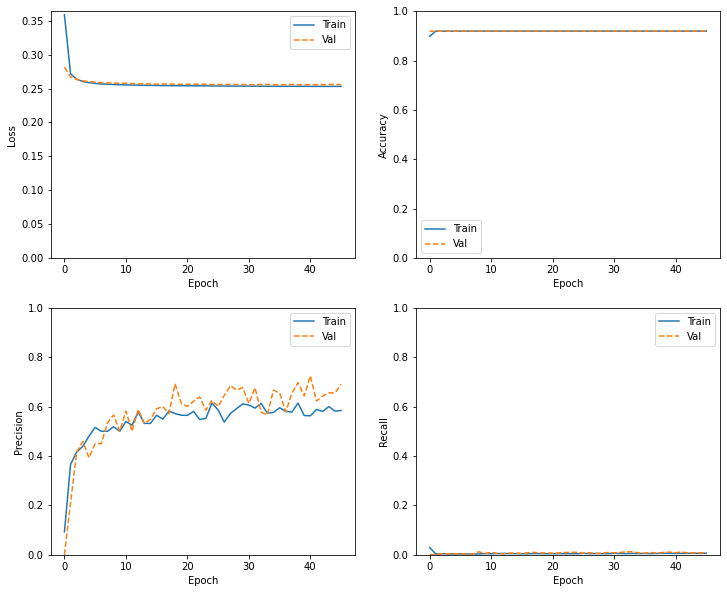

In [ ]:
plot_metrics(model_history)

In [ ]:
def label_func(y_pred, threshold):
    predictions = []
    for prob in y_pred:
        if prob <= threshold:
            predictions.append(0)
        else:
            predictions.append(1)
    return predictions

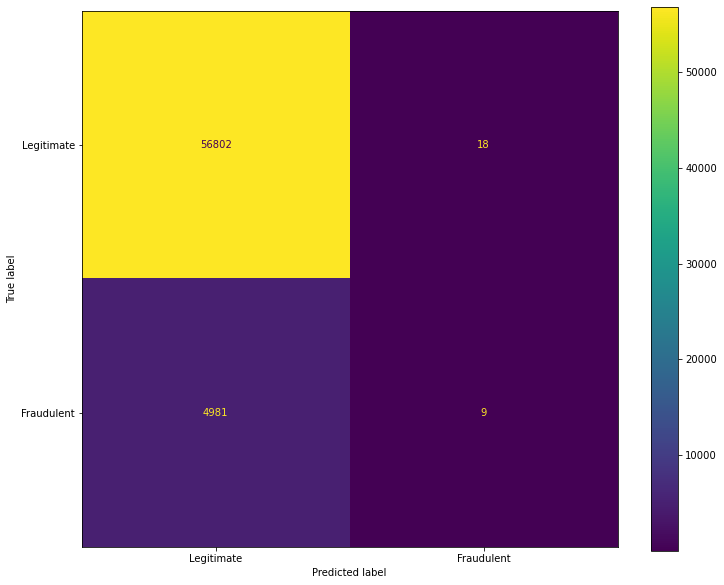

              precision    recall  f1-score   support

  Legitimate       0.92      1.00      0.96     56820
  Fraudulent       0.33      0.00      0.00      4990

    accuracy                           0.92     61810
   macro avg       0.63      0.50      0.48     61810
weighted avg       0.87      0.92      0.88     61810



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
predictions = label_func(y_pred, 0.5)

# creating and plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['Legitimate', 'Fraudulent'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, predictions, target_names=['Legitimate', 'Fraudulent']))

In [ ]:
# calculating class weights
neg, pos = np.bincount(y_train)
total = neg + pos

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.54
Weight for class 1: 6.19


In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

METRICS = [
      tensorflow.keras.metrics.TruePositives(name='tp'),
      tensorflow.keras.metrics.FalsePositives(name='fp'),
      tensorflow.keras.metrics.TrueNegatives(name='tn'),
      tensorflow.keras.metrics.FalseNegatives(name='fn'), 
      tensorflow.keras.metrics.BinaryAccuracy(name='accuracy'),
      tensorflow.keras.metrics.Precision(name='precision'),
      tensorflow.keras.metrics.Recall(name='recall'),
      tensorflow.keras.metrics.AUC(name='auc'),
      tensorflow.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model = Sequential()

model.add(Dense(23))

model.add(Dense(30, activation = 'relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=METRICS)

of_callback = early_stopping = tensorflow.keras.callbacks.EarlyStopping(
                                            monitor='val_prc', 
                                            verbose=1,
                                            patience=10,
                                            mode='max',
                                            restore_best_weights=True)

model_history = model.fit(x=X_train, y=y_train, batch_size=2048,
          validation_data=(X_validation, y_validation),
          epochs=100,
          callbacks=of_callback,
          class_weight=class_weight,
          verbose=1)

Epoch 1/100
106/106 [==============================] - 3s 11ms/step - loss: 0.6445 - tp: 11891.0000 - fp: 85004.0000 - tn: 112876.0000 - fn: 5486.0000 - accuracy: 0.5796 - precision: 0.1227 - recall: 0.6843 - auc: 0.6796 - prc: 0.1609 - val_loss: 0.6162 - val_tp: 1594.0000 - val_fp: 9169.0000 - val_tn: 18817.0000 - val_fn: 864.0000 - val_accuracy: 0.6704 - val_precision: 0.1481 - val_recall: 0.6485 - val_auc: 0.7128 - val_prc: 0.1897
Epoch 2/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6162 - tp: 11412.0000 - fp: 65851.0000 - tn: 132029.0000 - fn: 5965.0000 - accuracy: 0.6664 - precision: 0.1477 - recall: 0.6567 - auc: 0.7201 - prc: 0.1953 - val_loss: 0.6096 - val_tp: 1583.0000 - val_fp: 9008.0000 - val_tn: 18978.0000 - val_fn: 875.0000 - val_accuracy: 0.6754 - val_precision: 0.1495 - val_recall: 0.6440 - val_auc: 0.7154 - val_prc: 0.1948
Epoch 3/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6133 - tp: 11386.0000 - fp: 64829.0000 - tn: 133

Epoch 20/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6080 - tp: 11620.0000 - fp: 65360.0000 - tn: 132520.0000 - fn: 5757.0000 - accuracy: 0.6696 - precision: 0.1509 - recall: 0.6687 - auc: 0.7303 - prc: 0.2057 - val_loss: 0.5893 - val_tp: 1576.0000 - val_fp: 8693.0000 - val_tn: 19293.0000 - val_fn: 882.0000 - val_accuracy: 0.6855 - val_precision: 0.1535 - val_recall: 0.6412 - val_auc: 0.7174 - val_prc: 0.1975
Epoch 21/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6079 - tp: 11643.0000 - fp: 65424.0000 - tn: 132456.0000 - fn: 5734.0000 - accuracy: 0.6694 - precision: 0.1511 - recall: 0.6700 - auc: 0.7302 - prc: 0.2066 - val_loss: 0.5947 - val_tp: 1574.0000 - val_fp: 8836.0000 - val_tn: 19150.0000 - val_fn: 884.0000 - val_accuracy: 0.6807 - val_precision: 0.1512 - val_recall: 0.6404 - val_auc: 0.7161 - val_prc: 0.1975
Epoch 22/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6078 - tp: 11571.0000 - fp: 64932.0000 - tn: 1

Epoch 39/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6057 - tp: 11660.0000 - fp: 64971.0000 - tn: 132909.0000 - fn: 5717.0000 - accuracy: 0.6716 - precision: 0.1522 - recall: 0.6710 - auc: 0.7329 - prc: 0.2091 - val_loss: 0.6021 - val_tp: 1607.0000 - val_fp: 9099.0000 - val_tn: 18887.0000 - val_fn: 851.0000 - val_accuracy: 0.6732 - val_precision: 0.1501 - val_recall: 0.6538 - val_auc: 0.7191 - val_prc: 0.2003
Epoch 40/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6056 - tp: 11669.0000 - fp: 65118.0000 - tn: 132762.0000 - fn: 5708.0000 - accuracy: 0.6710 - precision: 0.1520 - recall: 0.6715 - auc: 0.7330 - prc: 0.2096 - val_loss: 0.6078 - val_tp: 1610.0000 - val_fp: 9245.0000 - val_tn: 18741.0000 - val_fn: 848.0000 - val_accuracy: 0.6685 - val_precision: 0.1483 - val_recall: 0.6550 - val_auc: 0.7190 - val_prc: 0.2017
Epoch 41/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6054 - tp: 11740.0000 - fp: 65599.0000 - tn: 1

Epoch 58/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6039 - tp: 11687.0000 - fp: 64342.0000 - tn: 133538.0000 - fn: 5690.0000 - accuracy: 0.6747 - precision: 0.1537 - recall: 0.6726 - auc: 0.7353 - prc: 0.2117 - val_loss: 0.6036 - val_tp: 1601.0000 - val_fp: 9031.0000 - val_tn: 18955.0000 - val_fn: 857.0000 - val_accuracy: 0.6752 - val_precision: 0.1506 - val_recall: 0.6513 - val_auc: 0.7201 - val_prc: 0.2032
Epoch 59/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6038 - tp: 11675.0000 - fp: 64604.0000 - tn: 133276.0000 - fn: 5702.0000 - accuracy: 0.6734 - precision: 0.1531 - recall: 0.6719 - auc: 0.7353 - prc: 0.2117 - val_loss: 0.5971 - val_tp: 1593.0000 - val_fp: 8957.0000 - val_tn: 19029.0000 - val_fn: 865.0000 - val_accuracy: 0.6774 - val_precision: 0.1510 - val_recall: 0.6481 - val_auc: 0.7200 - val_prc: 0.2036
Epoch 60/100
106/106 [==============================] - 0s 3ms/step - loss: 0.6036 - tp: 11675.0000 - fp: 64406.0000 - tn: 1

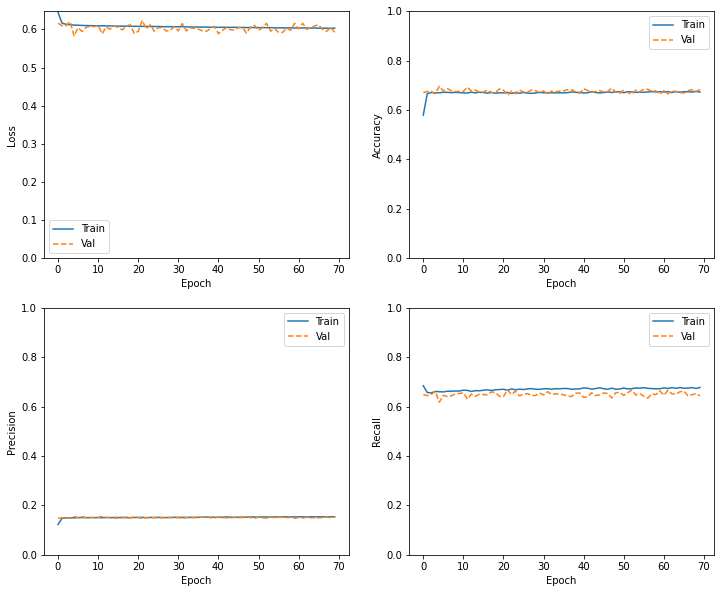

In [ ]:
plot_metrics(model_history)

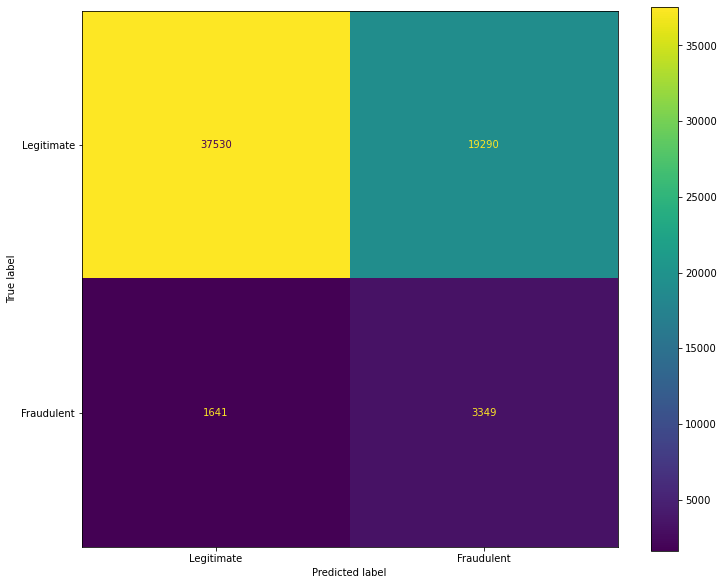

              precision    recall  f1-score   support

  Legitimate       0.96      0.66      0.78     56820
  Fraudulent       0.15      0.67      0.24      4990

    accuracy                           0.66     61810
   macro avg       0.55      0.67      0.51     61810
weighted avg       0.89      0.66      0.74     61810



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
predictions = label_func(y_pred, 0.5)

# creating and plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['Legitimate', 'Fraudulent'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, predictions, target_names=['Legitimate', 'Fraudulent']))

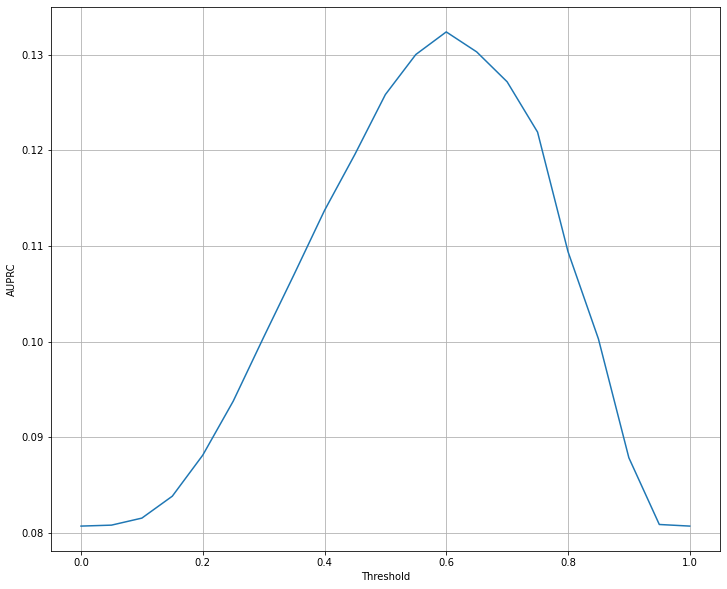

In [ ]:
# determining the optimum threshold
from sklearn.metrics import average_precision_score

thresholds = np.arange(0, 1.05, 0.05)
result_dic = {
'auprc' : [],
'thresholds' : []
}

for threshold in thresholds:
    predictions = label_func(y_pred, threshold)
    result_dic['auprc'].append(average_precision_score(y_test, predictions))
    result_dic['thresholds'].append(threshold)

plt.xlabel('Threshold')
plt.ylabel('AUPRC')
plt.grid()
plt.plot(result_dic['thresholds'], result_dic['auprc'])

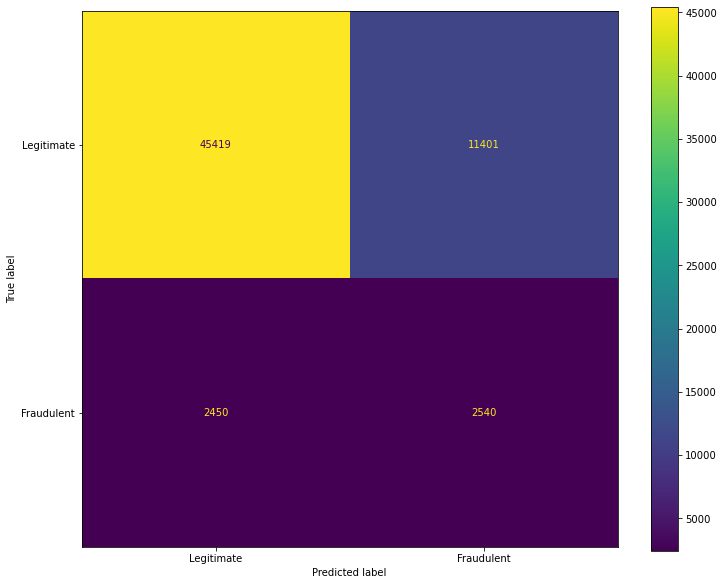

              precision    recall  f1-score   support

  Legitimate       0.95      0.80      0.87     56820
  Fraudulent       0.18      0.51      0.27      4990

    accuracy                           0.78     61810
   macro avg       0.57      0.65      0.57     61810
weighted avg       0.89      0.78      0.82     61810



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
predictions = label_func(y_pred, 0.60)

# creating and plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['Legitimate', 'Fraudulent'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, predictions, target_names=['Legitimate', 'Fraudulent']))